In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data=pd.read_csv(r"C:\Users\manik\Desktop\Exit-re-exam\bank.csv")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [3]:
data.info

<bound method DataFrame.info of        age          job   marital  education default  balance housing loan  \
0       59       admin.   married  secondary      no   2343.0     yes   no   
1       56       admin.   married  secondary      no     45.0      no   no   
2       41   technician   married  secondary      no   1270.0     yes   no   
3       55     services   married  secondary      no   2476.0     yes   no   
4       54       admin.   married   tertiary      no    184.0      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
10856   45    housemaid  divorced    primary      no    413.0     yes   no   
10857   51       admin.   married  secondary      no   4178.0     yes   no   
10858   40   management   married   tertiary      no   2147.0     yes   no   
10859   43  blue-collar   married  secondary      no   1096.0      no  yes   
10860   41       admin.    single   tertiary      no   1455.0     yes   no   

       contact   day month  dur

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
data.shape

(10861, 17)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64

In [8]:
data.drop(columns=["contact","poutcome","pdays","previous"],inplace=True,axis=1)

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,59,admin.,married,secondary,no,2343.0,yes,no,5.0,may,1042.0,1,yes
1,56,admin.,married,secondary,no,45.0,no,no,5.0,may,1467.0,1,yes
2,41,technician,married,secondary,no,1270.0,yes,no,5.0,may,1389.0,1,yes
3,55,services,married,secondary,no,2476.0,yes,no,5.0,may,579.0,1,yes
4,54,admin.,married,tertiary,no,184.0,no,no,5.0,may,673.0,2,yes


In [10]:
num_df=data.select_dtypes(include="number")
cat_df=data.select_dtypes(include="object")

In [11]:
num_df

,age,balance,day,duration,campaign
0,59,2343.0,5.0,1042.0,1
1,56,45.0,5.0,1467.0,1
2,41,1270.0,5.0,1389.0,1
3,55,2476.0,5.0,579.0,1
4,54,184.0,5.0,673.0,2
...,...,...,...,...,...
10856,45,413.0,30.0,65.0,1
10857,51,4178.0,30.0,556.0,1
10858,40,2147.0,30.0,115.0,1
10859,43,1096.0,30.0,180.0,1


In [12]:
cat_df

,job,marital,education,default,housing,loan,month,y
0,admin.,married,secondary,no,yes,no,may,yes
1,admin.,married,secondary,no,no,no,may,yes
2,technician,married,secondary,no,yes,no,may,yes
3,services,married,secondary,no,yes,no,may,yes
4,admin.,married,tertiary,no,no,no,may,yes
...,...,...,...,...,...,...,...,...
10856,housemaid,divorced,primary,no,yes,no,may,no
10857,admin.,married,secondary,no,yes,no,may,no
10858,management,married,tertiary,no,yes,no,may,no
10859,blue-collar,married,secondary,no,no,yes,may,no


['age', 'balance', 'day', 'duration', 'campaign']


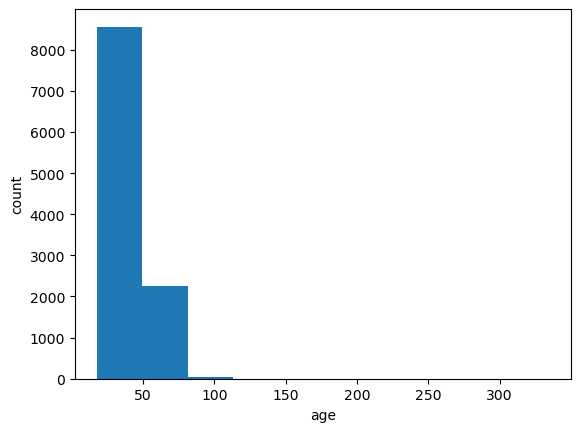

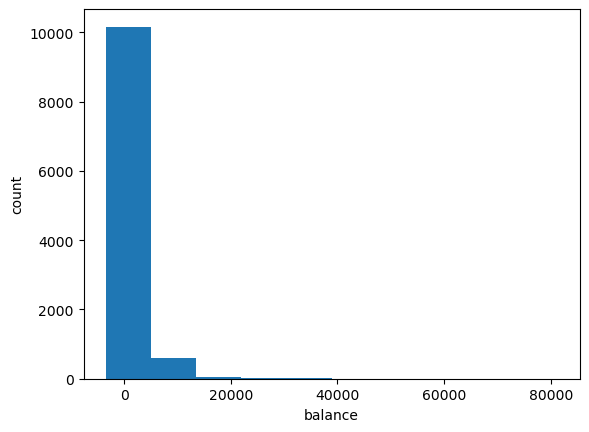

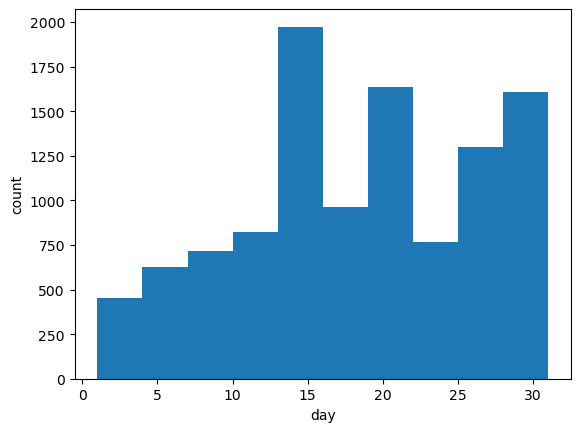

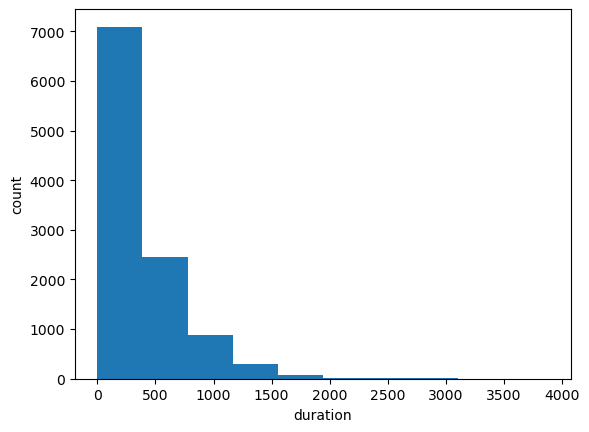

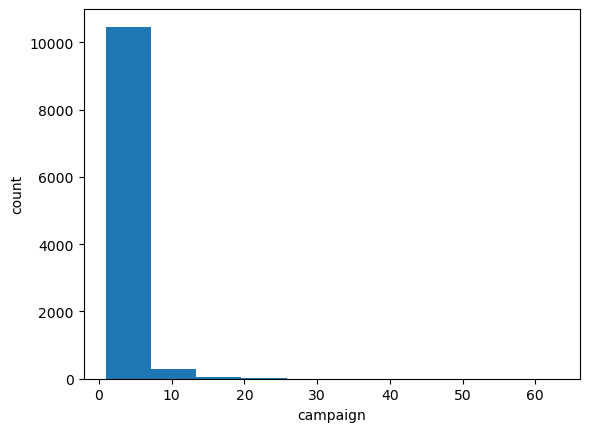

In [13]:
num_cols=num_df.columns.tolist()
print(num_cols)
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [14]:
for col in num_cols:
    num_df[col]=num_df[col].fillna(num_df[col].median())

In [15]:
num_df.isna().sum()

age         0
balance     0
day         0
duration    0
campaign    0
dtype: int64

In [16]:
cat_cols=cat_df.columns.tolist()
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']


In [17]:
for col in cat_cols:
    cat_df[col]=cat_df[col].fillna(cat_df[col].mode())

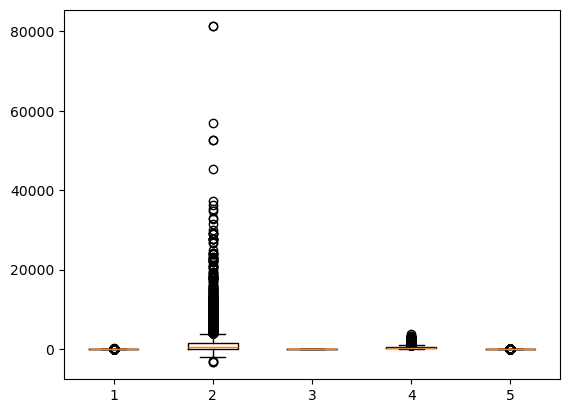

In [19]:
plt.boxplot(num_df)
plt.show()

In [20]:
def replace_outliers_with_upper_bound(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [21]:
for col in num_cols:
    num_df[col]=replace_outliers_with_upper_bound(num_df,col)

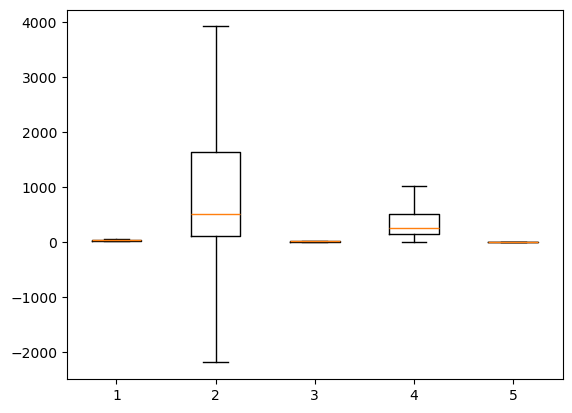

In [22]:
plt.boxplot(num_df)
plt.show()

In [23]:
for col in cat_cols:
    print(cat_df[col].value_counts())

job
blue-collar      2554
management       2134
technician       1718
admin.           1317
services          997
retired           664
student           326
self-employed     320
unemployed        314
entrepreneur      294
housemaid         159
unknown            49
Name: count, dtype: int64
marital
married     6169
single      3461
divorced    1231
Name: count, dtype: int64
education
secondary    5720
tertiary     3081
primary      1565
unknown       486
Name: count, dtype: int64
default
no     10691
yes      170
Name: count, dtype: int64
housing
yes    6954
no     3907
Name: count, dtype: int64
loan
no     9505
yes    1353
Name: count, dtype: int64
month
may    6497
aug     688
jul     627
apr     577
jun     546
feb     441
nov     403
oct     323
sep     269
mar     248
jan     142
dec     100
Name: count, dtype: int64
y
no     5572
yes    5289
Name: count, dtype: int64


In [24]:
for col in num_cols:
    print(num_df[col].value_counts())

age
32.0    533
31.0    522
33.0    480
34.0    464
35.0    438
30.0    433
36.0    413
37.0    356
29.0    353
28.0    328
39.0    325
38.0    316
40.0    308
41.0    287
42.0    277
27.0    267
46.0    263
44.0    261
43.0    260
45.0    257
26.0    246
69.5    237
47.0    225
49.0    217
25.0    194
53.0    192
48.0    191
52.0    182
54.0    176
51.0    170
50.0    169
55.0    163
57.0    161
60.0    156
59.0    143
56.0    140
58.0    139
24.0    132
23.0     82
61.0     62
22.0     60
62.0     39
64.0     35
21.0     33
63.0     30
66.0     24
67.0     23
20.0     22
68.0     21
65.0     21
69.0     17
19.0     11
18.0      7
Name: count, dtype: int64
balance
3922.0    1040
0.0        598
2.0         38
1.0         33
5.0         28
          ... 
1510.0       1
1726.0       1
1118.0       1
1729.0       1
2147.0       1
Name: count, Length: 3042, dtype: int64
day
15.0    701
13.0    638
28.0    636
14.0    635
27.0    631
21.0    621
20.0    562
16.0    561
29.0    555
23.0    5

<Axes: >

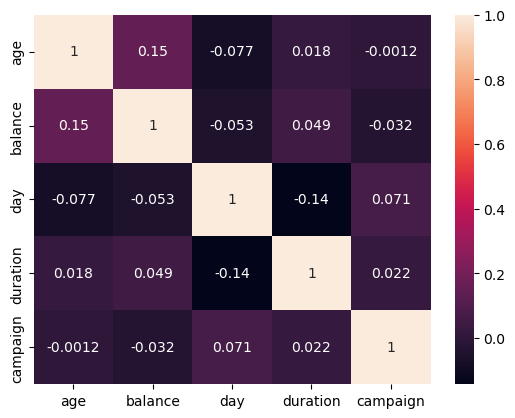

In [25]:
correlation=num_df.corr()
sns.heatmap(correlation,annot=True)

In [26]:
for col in num_cols:
    num_df[col]=(num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

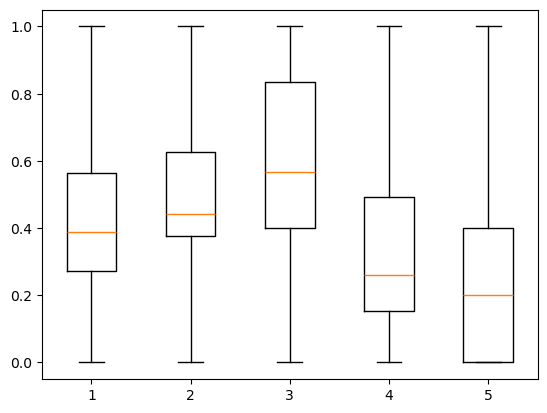

In [27]:
plt.boxplot(num_df)
plt.show()

In [28]:
for col in cat_df[:-1]:
    encoder=LabelEncoder()
    cat_df[col]=encoder.fit_transform(cat_df[col])

In [29]:
cat_df

,job,marital,education,default,housing,loan,month,y
0,0,1,1,0,1,0,8,1
1,0,1,1,0,0,0,8,1
2,9,1,1,0,1,0,8,1
3,7,1,1,0,1,0,8,1
4,0,1,2,0,0,0,8,1
...,...,...,...,...,...,...,...,...
10856,3,0,0,0,1,0,8,0
10857,0,1,1,0,1,0,8,0
10858,4,1,2,0,1,0,8,0
10859,1,1,1,0,0,1,8,0


In [30]:
data.value_counts("y")

y
no     5572
yes    5289
Name: count, dtype: int64

In [31]:
final_df=pd.concat([num_df,cat_df],axis=1)
final_df.head()

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,month,y
0,0.796117,0.741317,0.133333,1.000000,0.0,0,1,1,0,1,0,8,1
1,0.737864,0.364843,0.133333,1.000000,0.0,0,1,1,0,0,0,8,1
2,0.446602,0.565531,0.133333,1.000000,0.0,9,1,1,0,1,0,8,1
3,0.718447,0.763106,0.133333,0.561047,0.0,7,1,1,0,1,0,8,1
4,0.699029,0.387615,0.133333,0.652132,0.2,0,1,2,0,0,0,8,1


In [32]:
X=final_df.drop(columns=["y"],axis=1)
y=final_df["y"]

In [33]:
X

,age,balance,day,duration,campaign,job,marital,education,default,housing,loan,month
0,0.796117,0.741317,0.133333,1.000000,0.0,0,1,1,0,1,0,8
1,0.737864,0.364843,0.133333,1.000000,0.0,0,1,1,0,0,0,8
2,0.446602,0.565531,0.133333,1.000000,0.0,9,1,1,0,1,0,8
3,0.718447,0.763106,0.133333,0.561047,0.0,7,1,1,0,1,0,8
4,0.699029,0.387615,0.133333,0.652132,0.2,0,1,2,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10856,0.524272,0.425131,0.966667,0.062984,0.0,3,0,0,0,1,0,8
10857,0.640777,1.000000,0.966667,0.538760,0.0,0,1,1,0,1,0,8
10858,0.427184,0.709207,0.966667,0.111434,0.0,4,1,2,0,1,0,8
10859,0.485437,0.537025,0.966667,0.174419,0.0,1,1,1,0,0,1,8


In [34]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10856    0
10857    0
10858    0
10859    0
10860    0
Name: y, Length: 10861, dtype: int32

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
num_df

,age,balance,day,duration,campaign
0,0.796117,0.741317,0.133333,1.000000,0.0
1,0.737864,0.364843,0.133333,1.000000,0.0
2,0.446602,0.565531,0.133333,1.000000,0.0
3,0.718447,0.763106,0.133333,0.561047,0.0
4,0.699029,0.387615,0.133333,0.652132,0.2
...,...,...,...,...,...
10856,0.524272,0.425131,0.966667,0.062984,0.0
10857,0.640777,1.000000,0.966667,0.538760,0.0
10858,0.427184,0.709207,0.966667,0.111434,0.0
10859,0.485437,0.537025,0.966667,0.174419,0.0


In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [38]:
lr_accuracy = accuracy_score(y_test,y_pred)
print(lr_accuracy)

0.8808099401748735


In [39]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [40]:
rf_accuracy = accuracy_score(y_test,y_pred)
print(rf_accuracy)

0.9627243442245743


In [41]:
import pickle
with open("model.pkl",'wb') as f:
    pickle.dump(rf,f)
